In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.io import ascii
from astropy.table import join
import xmatch
import Tools
from astropy.io import fits
import glob


In [10]:
Catalog=ascii.read("../A-Catalogs/Binospec-Candels.cat")
HaLines=ascii.read("../A-Catalogs/HaLines.cat")
NoDetHaLines=ascii.read("../A-Catalogs/HaLinesNonDetect.cat")
columnsNames=["id","ra","dec","zlya","photoz","Flag"]
columns=["id_charlotte","ra_candels","dec_candels","z","photoz"]



#### Binospec detection, No Ha/Oiii

##### GET Ids
##### GET RA, DEC and zLya

In [11]:
laeid = HaLines[(HaLines["Ha"] == "X") & (HaLines["Oiii"] == "X")]["ID"].tolist()
Data = Catalog[np.isin(Catalog["id_charlotte"],laeid)]
Data = Data[columns]
Data["Flag"]=np.ones(len(Data)).astype(int)



#### Binospec detection, No Match to catalog


In [12]:
laeNomatch = Catalog[(Catalog["Type"] == "LAE") & (Catalog["inFresco"] == "OnlyFoV")]
laeNomatch = laeNomatch[columns]
laeNomatch["Flag"] = np.ones(len(laeNomatch)).astype(int) * 2
laeNomatch=[laeNomatch[k] for k in laeNomatch.columns]

Data.add_row(laeNomatch)


ValueError: Unable to insert row because of exception in column 'id_charlotte':
zero-size array to reduction operation maximum which has no identity

#### Binospec detection, Ha Contamination Cases


In [ ]:

laeid=["Stark11_33_17705","z5_GND_17752"]
D = Catalog[np.isin(Catalog["id_charlotte"],laeid)]
D=D[columns]
D["Flag"]=np.ones(len(D)).astype(int)*3
D=np.array([D[k].value for k in D.columns]).T
[Data.add_row(D[i]) for i in range(0,len(D))]

[None, None]

#### No Binospec detection (HST detected), No match in catalog


In [ ]:
laeNomatch = Catalog[(Catalog["Type"] == "NonDetect") & (Catalog["inFresco"] == "OnlyFoV")]
laeNomatch = laeNomatch[columns]
laeNomatch["Flag"] = np.ones(len(laeNomatch)).astype(int) * 4
D=laeNomatch
D=np.array([D[k].value for k in D.columns]).T
[Data.add_row(D[i]) for i in range(0,len(D))]

[None, None, None, None, None, None, None, None, None]

In [ ]:
ascii.write(Data,"../A-Catalogs/ForRomain.cat",overwrite=True)

### Check Galaxies that we dont agree on :

In [ ]:
Catalog=ascii.read("../A-Catalogs/Binospec-Candels.cat")
AlbaHa=ascii.read("../A-Catalogs/Ha_fresco_GN_v2.csv")

idx,d2d=xmatch.xmatch(AlbaHa["ra"],AlbaHa["dec"],Catalog["ra_candels"],Catalog["dec_candels"])
mask=[]
for i,d in zip(idx,d2d):
    if d.value<(0.5/3600.):
        #print(i,d)
        mask.append(True)
    else:
        mask.append(False)

AlbaHa = AlbaHa[mask]
Catalog=Catalog[idx[mask]]

Lyamask=[Catalog["Type"]=="LAE"]


AlbaHa=AlbaHa[Lyamask]
Catalog=Catalog[Lyamask]

for i in range(0,len(Catalog)):
    if AlbaHa[i]["q_final"]>1.75 and np.abs(AlbaHa[i]["z_map"]-Catalog[i]["z"])>0.01:
        print("ID :",Catalog[i]["id_charlotte"], "   Alba ID: ",AlbaHa[i]["id"] ,"Alba: ",AlbaHa[i]["z_map"],"  Bino: ",Catalog[i]["z"],"  Quality: ", AlbaHa[i]["q_final"])

ID : z5_GND_10047    Alba ID:  6732 Alba:  5.194   Bino:  6.011191597375274   Quality:  3.0
ID : z5_GND_23860    Alba ID:  20071 Alba:  5.092   Bino:  6.58500311635492   Quality:  2.25
ID : z8_GND_35384    Alba ID:  28978 Alba:  6.55   Bino:  6.874496145275204   Quality:  2.0
ID : z5_GNW_12024    Alba ID:  32448 Alba:  5.652   Bino:  5.1681896597641295   Quality:  3.0
ID : z6_GNW_11543    Alba ID:  32735 Alba:  5.611   Bino:  5.769960179845872   Quality:  3.0


/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:1502: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  newcol = col[slice_]
/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/numpy/ma/core.py:3224: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/numpy/ma/core.py:3256: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be int

## Romain Extractions

In [13]:
f=fits.open("../A-Catalogs/Romain/GonzaloPrietoLyon_MMTLyA_matchedFRESCOv7.fits")
Catalog=ascii.read("../A-Catalogs/Binospec-Candels.cat")

fresco_id=f[1].data["id"]
Bino_id=f[1].data["id_charlotte"]

In [14]:
f[1].data

FITS_rec([(  491, 189.19909027, 62.32099628, 'Jung18_z6_GND_5752', 189.19908156, 62.32098098, 6.58712943, 5.69999981, 1, 0.05697537),
          (32735, 189.15741807, 62.1765151 , 'z6_GNW_11543', 189.15744108, 62.17650152, 5.76996018, 5.7       , 1, 0.06234076),
          (13902, 189.09185092, 62.25374839, 'z5_GND_17752', 189.09179789, 62.25373546, 5.77506165, 5.46      , 3, 0.10032696),
          ( 6181, 189.17510657, 62.28224695, 'z6_GND_44831', 189.17513458, 62.28226654, 6.73664539, 6.22      , 1, 0.08468816),
          (15339, 189.34779338, 62.24985405, 'z6_GND_19165', 189.34773322, 62.24986594, 6.04966765, 6.04      , 1, 0.10955287),
          ( 3100, 189.23518927, 62.29558412, 'z7_GND_43678', 189.2352011 , 62.29559743, 6.12174035, 6.72      , 1, 0.05185374),
          (16108, 189.03992946, 62.24771283, 'Stark11_43_3982', 189.0399444 , 62.24772144, 5.70890836, 5.57000017, 1, 0.03984334),
          (29821, 189.15637536, 62.1976832 , 'z6_GND_36553', 189.15639949, 62.19771589, 5.61215

In [15]:
def angstromTokms2(centralA,As):
    c=299792
    v=c*(As-centralA)/centralA
    return v

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
24032 Jung18_z6_GND_28438
6.553687390077254
$\frac{S}{N}$ :  2.2465873225442197


<ipython-input-62-a2ab766e9b04>:27: RuntimeWarning: invalid value encountered in true_divide
  ax1.plot(oriWave,f1D[1].data["line"]/f1D[1].data["flat"],lw=1,color="#702963",ls="--",alpha=0.8,zorder=0)
<ipython-input-62-a2ab766e9b04>:28: RuntimeWarning: invalid value encountered in true_divide
  ax1.plot(oriWave,f1D[1].data["flux"]/f1D[1].data["flat"],lw=2,color="#702963",alpha=0.6,zorder=100)
<ipython-input-62-a2ab766e9b04>:29: RuntimeWarning: invalid value encountered in true_divide
  ax1.fill_between(oriWave,-f1D[1].data["err"]/f1D[1].data["flat"],f1D[1].data["err"]/f1D[1].data["flat"],color='#702963',alpha=0.2,zorder=-10)
<ipython-input-62-a2ab766e9b04>:33: RuntimeWarning: invalid value encountered in true_divide
  ax2.plot(Wave,f1D[1].data["flux"]/f1D[1].data["flat"]," ")
<ipython-input-62-a2ab766e9b04>:49: RuntimeWarning: invalid value encountered in true_divide
  datos=(f1D[1].data["flux"]/f1D[1].data["flat"])[mask]
<ipython-input-62-a2ab766e9b04>:61: RuntimeWarning: invalid valu

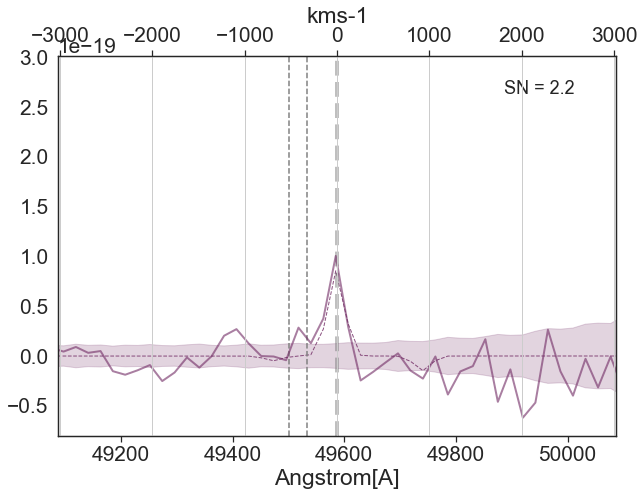

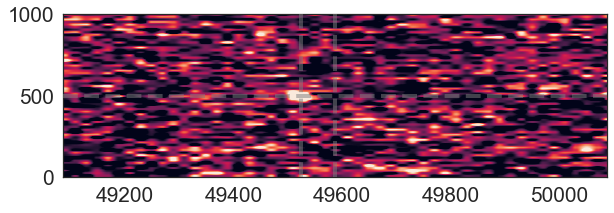

In [62]:
from scipy import interpolate
import ipympl

%load_ext autoreload
%autoreload 
%matplotlib inline

i=17
id=fresco_id[i]


print(fresco_id[i],Bino_id[i])
f1D=fits.open(glob.glob("../A-Catalogs/Romain/Output/*"+str(id)+".1D.fits")[0])
f2D=fits.open(glob.glob("../A-Catalogs/Romain/Output/*"+str(id)+".stack.fits")[0])

sns.set_theme(style="white",font_scale = 1.9)
plt.rcParams["figure.figsize"] = (10,7)
fig, ax1 = plt.subplots()

print(f[1].data["z"][i])
Ha=6564.614*(1+f[1].data["z"][i])
#Oiii=5008.239*(1+CatBino[i]['photoz'])

Wave=angstromTokms2(Ha,f1D[1].data["wave"])
oriWave=f1D[1].data["wave"]

ax1.plot(oriWave,f1D[1].data["line"]/f1D[1].data["flat"],lw=1,color="#702963",ls="--",alpha=0.8,zorder=0)
ax1.plot(oriWave,f1D[1].data["flux"]/f1D[1].data["flat"],lw=2,color="#702963",alpha=0.6,zorder=100)
ax1.fill_between(oriWave,-f1D[1].data["err"]/f1D[1].data["flat"],f1D[1].data["err"]/f1D[1].data["flat"],color='#702963',alpha=0.2,zorder=-10)
ax1.set_xlabel("Angstrom[A]")
ax1.tick_params('y')
ax2 = ax1.twiny()
ax2.plot(Wave,f1D[1].data["flux"]/f1D[1].data["flat"]," ")
ax2.tick_params('y', colors='r')
ax2.set_xlabel("kms-1")
ax1.axvline(x=Ha,ls="--",color="grey",label="Expected Ha",alpha=0.5,lw=4,zorder=0)
interp = interpolate.interp1d(oriWave, Wave)


Ha=Ha

Limit=True
if Limit==True:
    x_min = Ha-500#min(oriWave)
    x_max = Ha+500#max(oriWave)
    ax1.set_xlim(x_min, x_max)
    ax2.set_xlim(interp(x_min), interp(x_max))
    mask=(np.array(oriWave)>x_min) & (np.array(oriWave)<x_max)
    datos=(f1D[1].data["flux"]/f1D[1].data["flat"])[mask]
    ax1.set_ylim(np.min(datos)*1.3, np.max(datos)*3)


test_fwhm=True
if test_fwhm==True:
    move=70
    pos=Ha-move
    fwhm=Tools.kmsToangstrom(200,pos)
    mask=(np.array(oriWave)>pos-fwhm/2) & (np.array(oriWave)<pos+fwhm/2)
    ax1.axvline(x=pos-fwhm/2,ls="--",color="gray")
    ax1.axvline(x=pos+fwhm/2,ls="--",color="gray")
    Signal=(np.sum((f1D[1].data["flux"]/f1D[1].data["flat"])[mask]))
    Noise=np.sqrt(np.sum(((f1D[1].data["err"]/f1D[1].data["flat"])[mask])**2))
    SN=Signal/Noise
    ax1.text(0.8,0.9,s=r"SN = "+str(np.round(SN,1)),transform=ax1.transAxes,fontsize=18)
    print(r"$\frac{S}{N}$ : ", SN)




plt.grid()
plt.show()


# S/N



plt.rcParams["figure.figsize"] = (10,3)
fig, ax1 = plt.subplots()
ax1.imshow(f2D[1].data,extent=[38200,50800,0,1000],aspect=0.3,vmin=-0.003,vmax=0.01)
ax1.axvline(x=Ha,ls="--",color="grey",label="Expected Ha",alpha=0.5,lw=4,zorder=10)
ax1.axvline(x=49525,ls="--",color="grey",label="Expected Ha",alpha=0.5,lw=4,zorder=10)

ax1.axhline(y=500,ls="--",color="grey",label="Expected Ha",alpha=0.5,lw=4,zorder=10)

ax1.set_xlim(x_min, x_max)


plt.show()

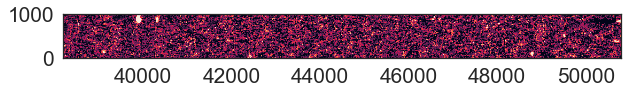

In [60]:
plt.imshow(f2D[1].data,extent=[38200,50800,0,1000],aspect=1,vmin=-0.003,vmax=0.01)


In [43]:
f2D[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  630                                                  
NAXIS2  =                   64                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
CRPIX1  =                  316                                                  
CRPIX2  =                   33                                                  
CRVAL1  =                 4.45                                                  
CD1_1   =                0.002                                                  
CD1_2   =                  0.0                                                  
CRVAL2  =                  0

In [14]:
Changes=[2,17,18]

In [15]:
len(fresco_id)

21

In the wake of JWST's launch, the prospects for constraining the Epoch of Reionisation are sunnier than ever. This conference will provide a wide overview on the state of the modeling of reionisation, current and upcoming observations of the EoR, and prospects for studying the intergalactic medium across cosmic time.

The central themes of the conference will be:

Modeling the Epoch of Reionisation: From large-scale numerical simulations to semi-analytic and semi-numerical models, what recent progress has been made in modeling the epoch of reionisation at 5.5<10? How do we best overcome the scale problem, coupling parsec to Gigaparsec scales? What extra modeling ingredients, if any, do we need in order to compare to existing and upcoming observations?

Forecasts of the 21cm signal: As theorists, are we ready for the first maps of reionisation from 21cm experiments? How should we best perform parameter inference from the first detections? What can we expect to learn?

Observational tests of the EoR: How much do we already know about the reionisation history? What can we learn from observations with JWST? How do we best utilise the information coming from high-redshift quasar absorption to constrain reionisation?

The intergalactic medium across cosmic time: What can we learn from studying the intergalactic medium after hydrogen reionisation? When does helium reionisation happen, how long does it last, and what can we learn about its sources? What are the prospects for precision studies of the IGM at z<5?